#EDA to Prediction (DieTanic)

Kaggle의 EDA to Prediction (DieTanic) 노트북은 Titanic: Machine Learning from Disaster라는 유명한 튜토리얼 대회에서 사용되는 데이터를 기반으로 한 예제이다. 이 데이터는 1912년에 침몰한 타이타닉 호의 승객 정보를 포함하며, 승객이 생존했는지 여부를 예측하는 문제를 다룬다. 이 프로젝트는 특히 데이터 분석(EDA)과 기초적인 예측 모델링을 연습하는 데 적합하다.


---



## part 1: Exploratory Data Analysis(EDA)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ESAA/dataset/DieTanic/train.csv')

In [ ]:
data.head()
# Pclass: 좌석 등급, Sibsp: 형제자매 및 배우자수, Parch: 부모 및 자녀 수, Embarked: 탑승

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.isnull().sum() # checking for total null values

# The Age, Cabin, Embarked have null values. I will try to fix them

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


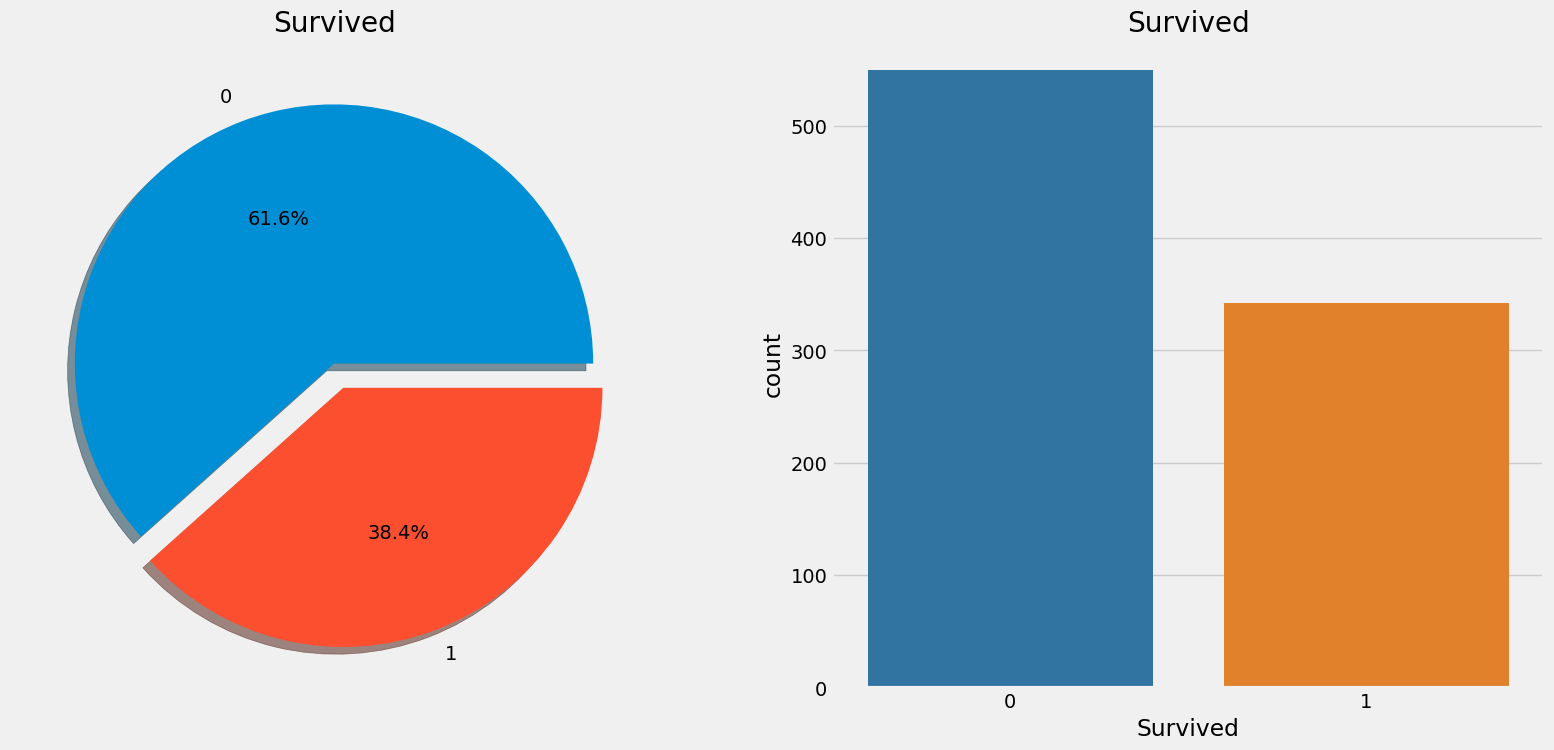

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=data, ax=ax[1], palette=['#1f77b4', '#ff7f0e'])
ax[1].set_title('Survived')
plt.show()

In [ ]:
data.shape
# 두 그래프를 통해 891명의 탑승객 중 38.4%만이 생존했음을 알 수 있다.

(891, 12)

In [ ]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

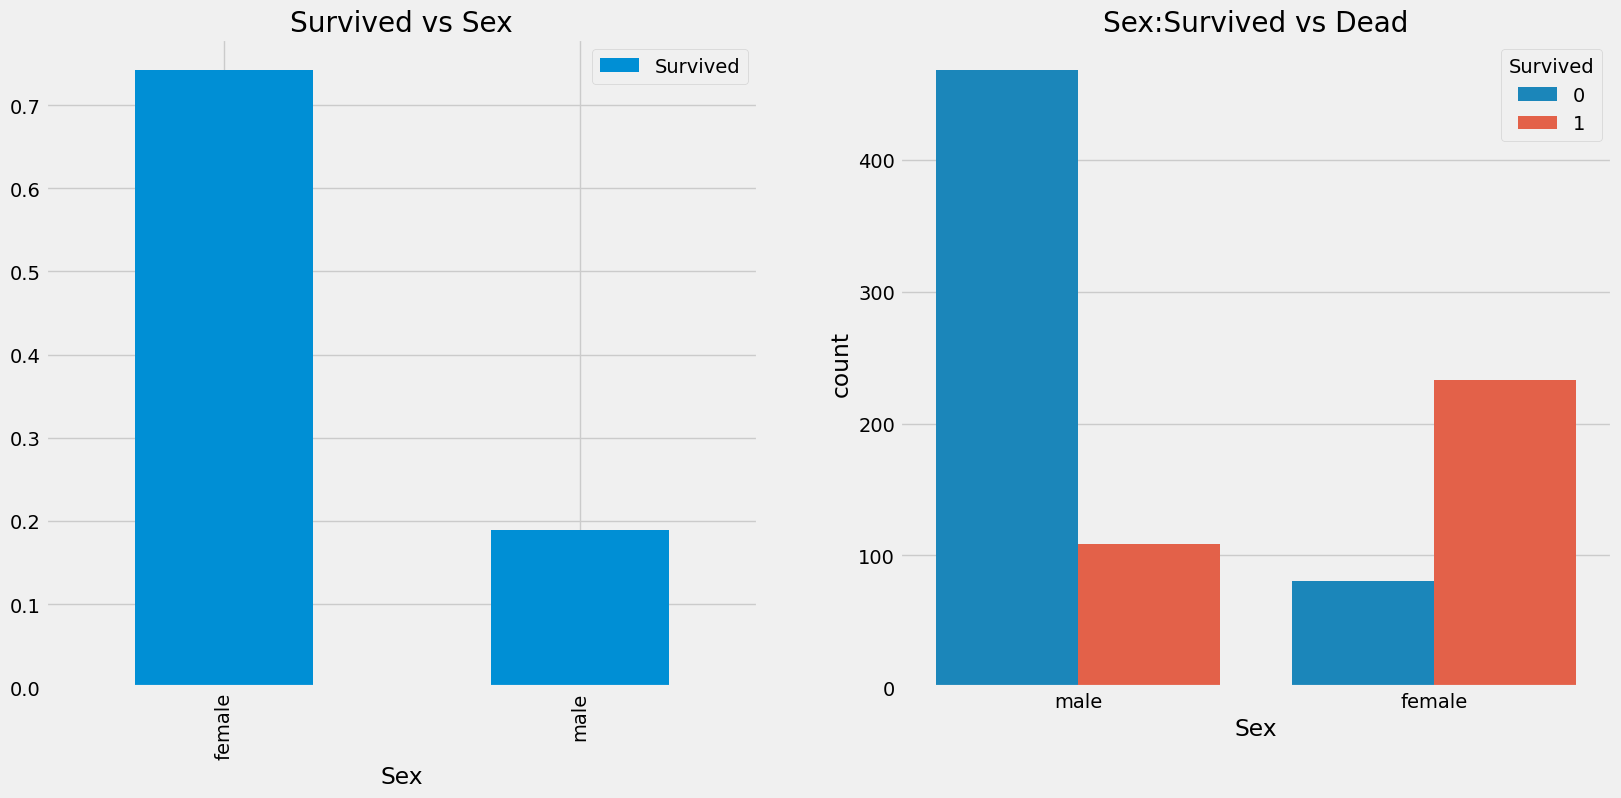

In [ ]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0]) # 성별 별 평균 생존율 그래프
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex', hue='Survived',data=data, ax=ax[1]) # 성별 별 생존자/사망자수 막대그래프
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [ ]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


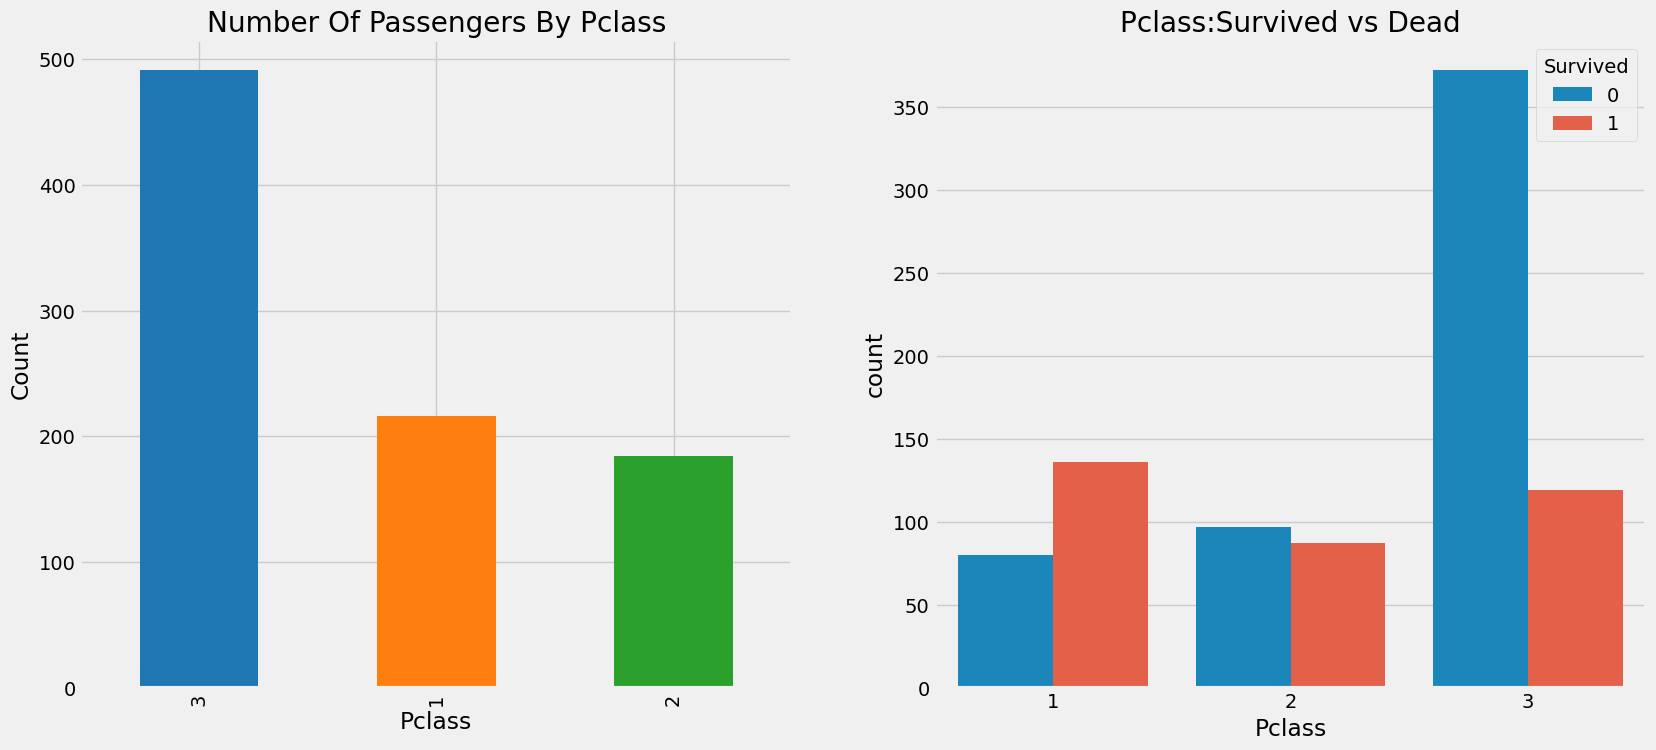

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#1f77b4', '#ff7f0e', '#2ca02c'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

# 1등급 객실: 생존자 > 사망자
# 2,3등급 객실: 사망자 < 생존자
# 특히 3등급 객실은 사망자의 비율이 월등히 큼

In [ ]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

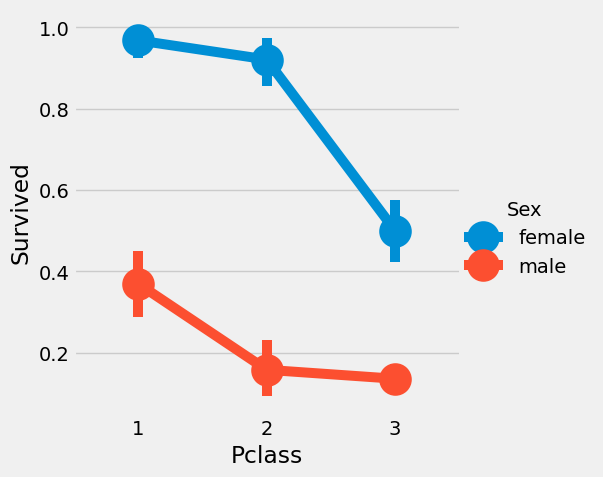

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=data, kind='point')
plt.show()

# 1등급 객실 여성의 생존율: 95-96% (3 die out of 94)



---



In [ ]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(),'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


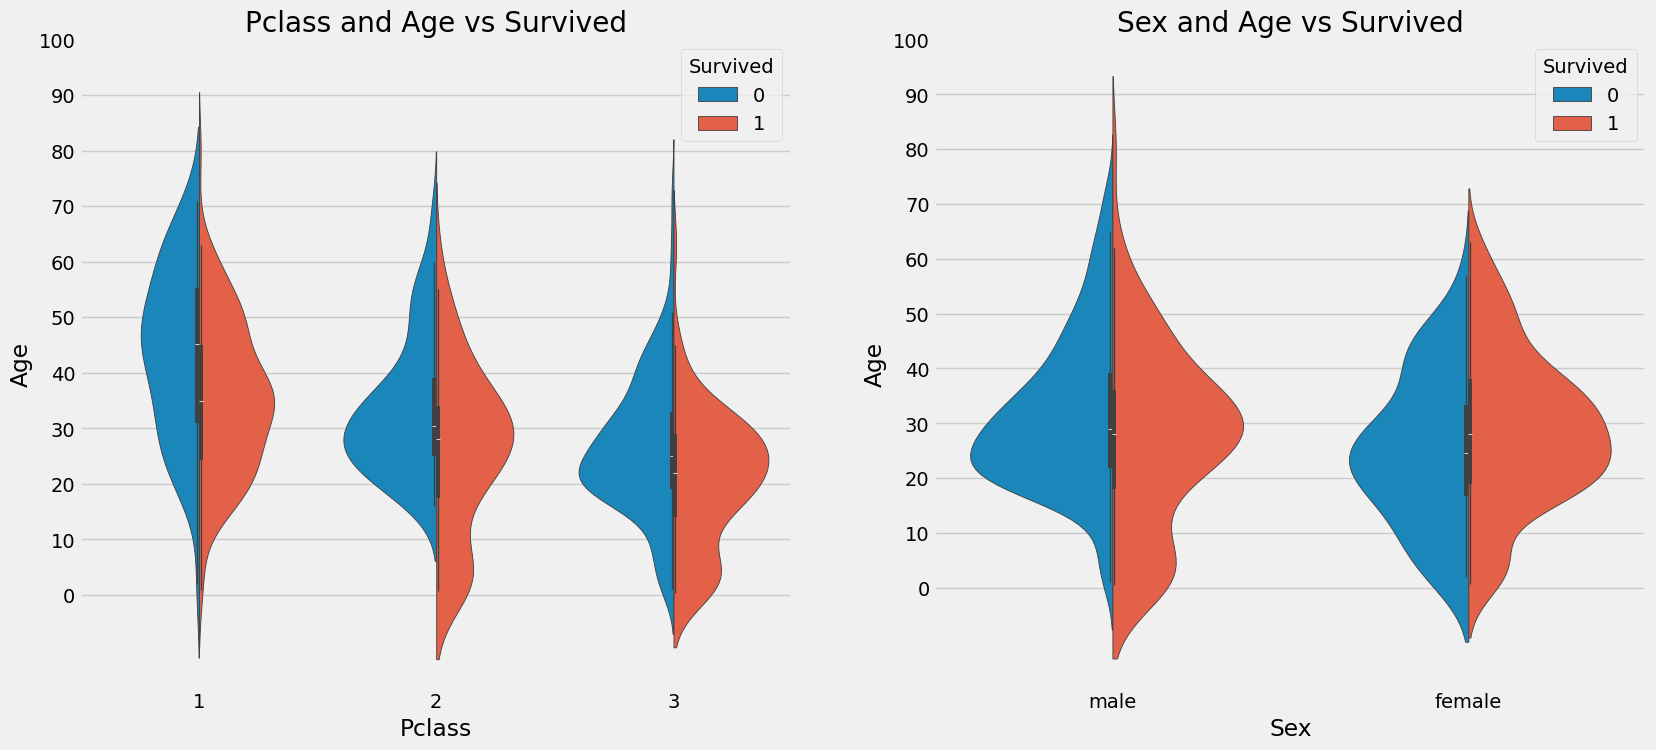

In [ ]:
f, ax = plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot(x="Sex",y="Age", hue="Survived", data=data,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

Age 변수에는 177개의 결측값이 있으며, 이를 평균 나이로 대체할 수 있지만, 단순히 평균(29세)을 4살 아이에게 적용하는 것은 적절하지 않습니다. 이를 해결하기 위해 Name 변수에 포함된 **호칭(Mr, Mrs)**을 이용할 수 있습니다. 호칭을 기준으로 그룹을 나누어, 각각의 그룹에 해당하는 평균 나이로 결측값을 채울 수 있습니다.

In [ ]:
data['Initial']=0 # 새로운 열 초기화

# Name에서 호칭(예: Mr., Mrs., Miss 등) 추출
for i in data:
  data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.') # .로 끝나는 알파벳 대소문자를 하나이상 찾는다.

In [ ]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')
# Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
# 다양한 호칭을 모두 Miss, Mr, Mrs, Other로 바꿔준다
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
data.groupby('Initial')['Age'].mean()

,Age
Initial,
Master,4.574167
Miss,21.860000
Mr,32.739609
Mrs,35.981818
Other,45.888889


In [ ]:
# Fill NaN values with the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [ ]:
data.Age.isnull().any()

False

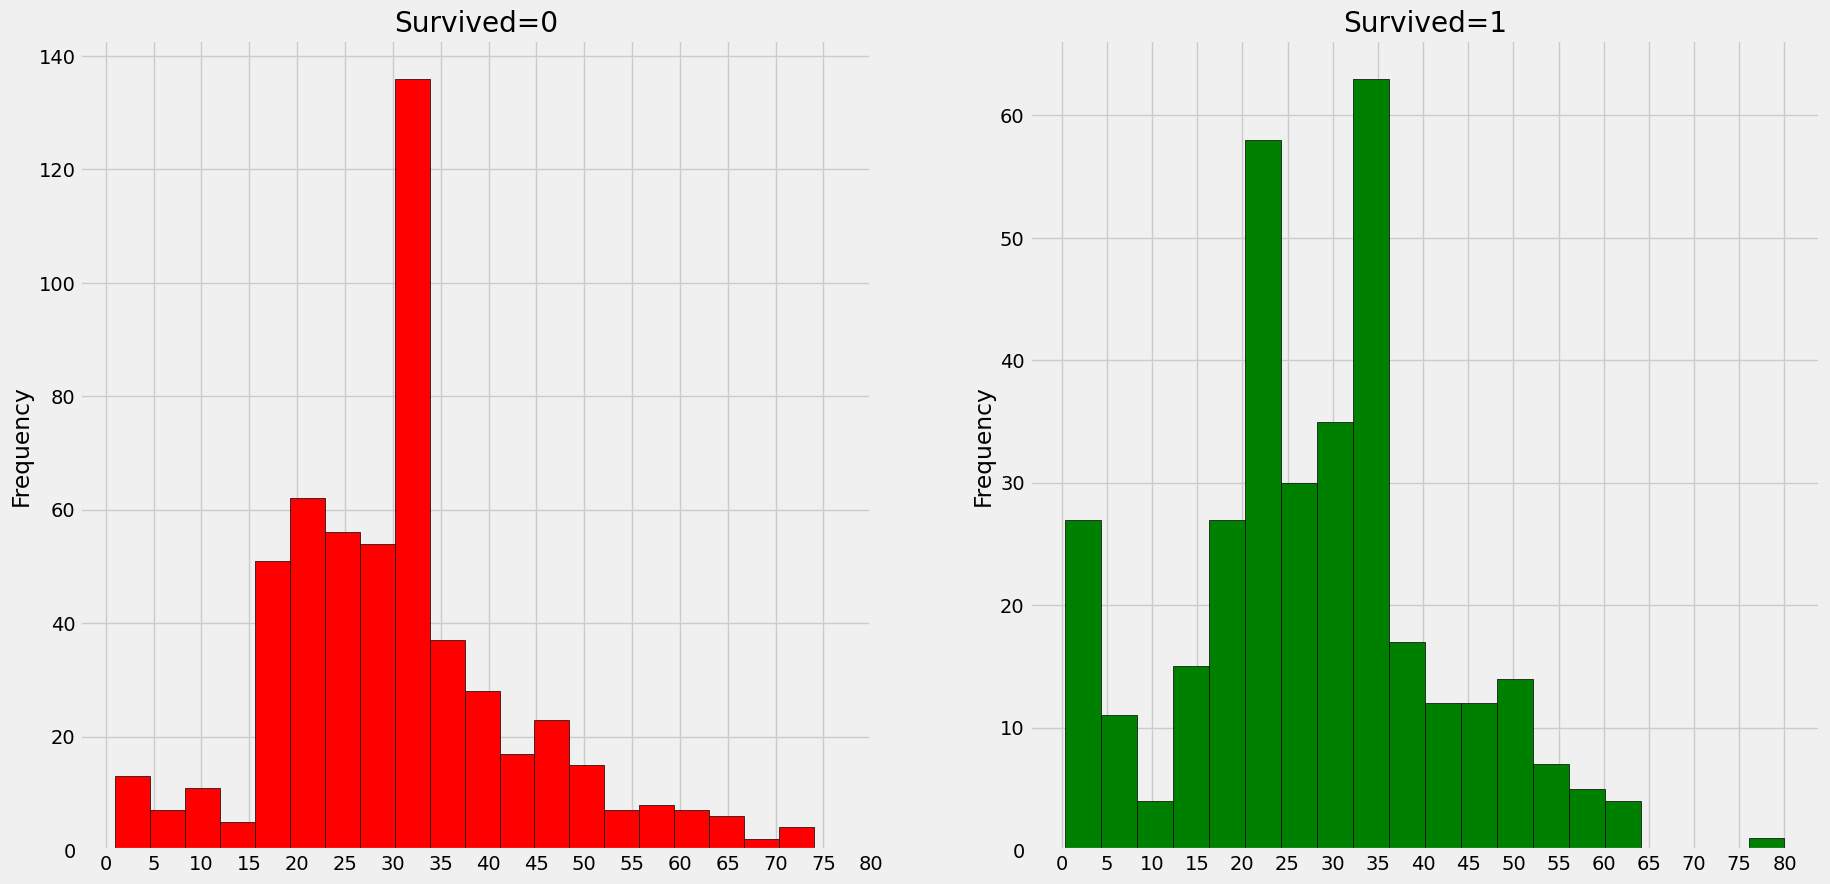

In [ ]:
f, ax = plt.subplots(1,2,figsize=(20,10))
data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived=0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived=1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()


# 유아(0~5세) 생존자는 많음
# 사망자 최대 나이대: 30~40세



---



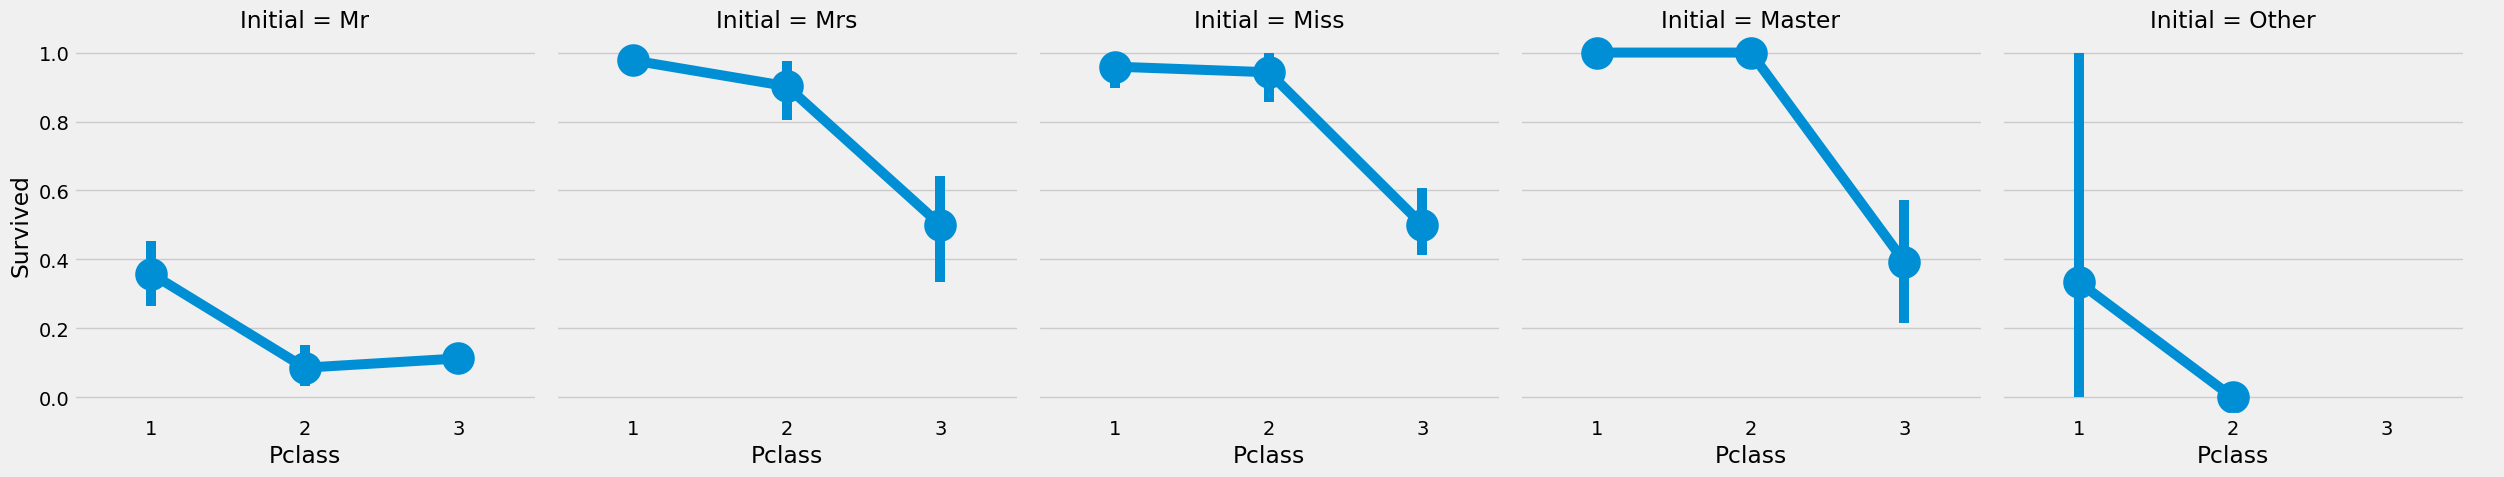

In [ ]:
sns.catplot(x='Pclass',y='Survived',col='Initial',data=data, kind='point')
plt.show()

In [ ]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

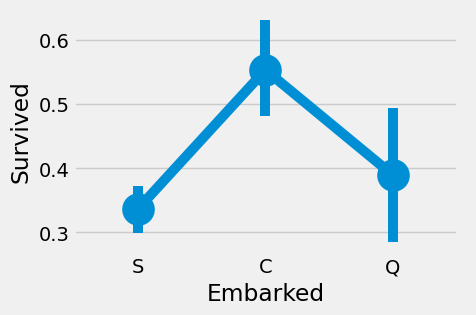

In [ ]:
sns.catplot(x='Embarked',y='Survived', data=data, kind='point')
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

# port C의 생존율 최대, port S의 생존율 최하

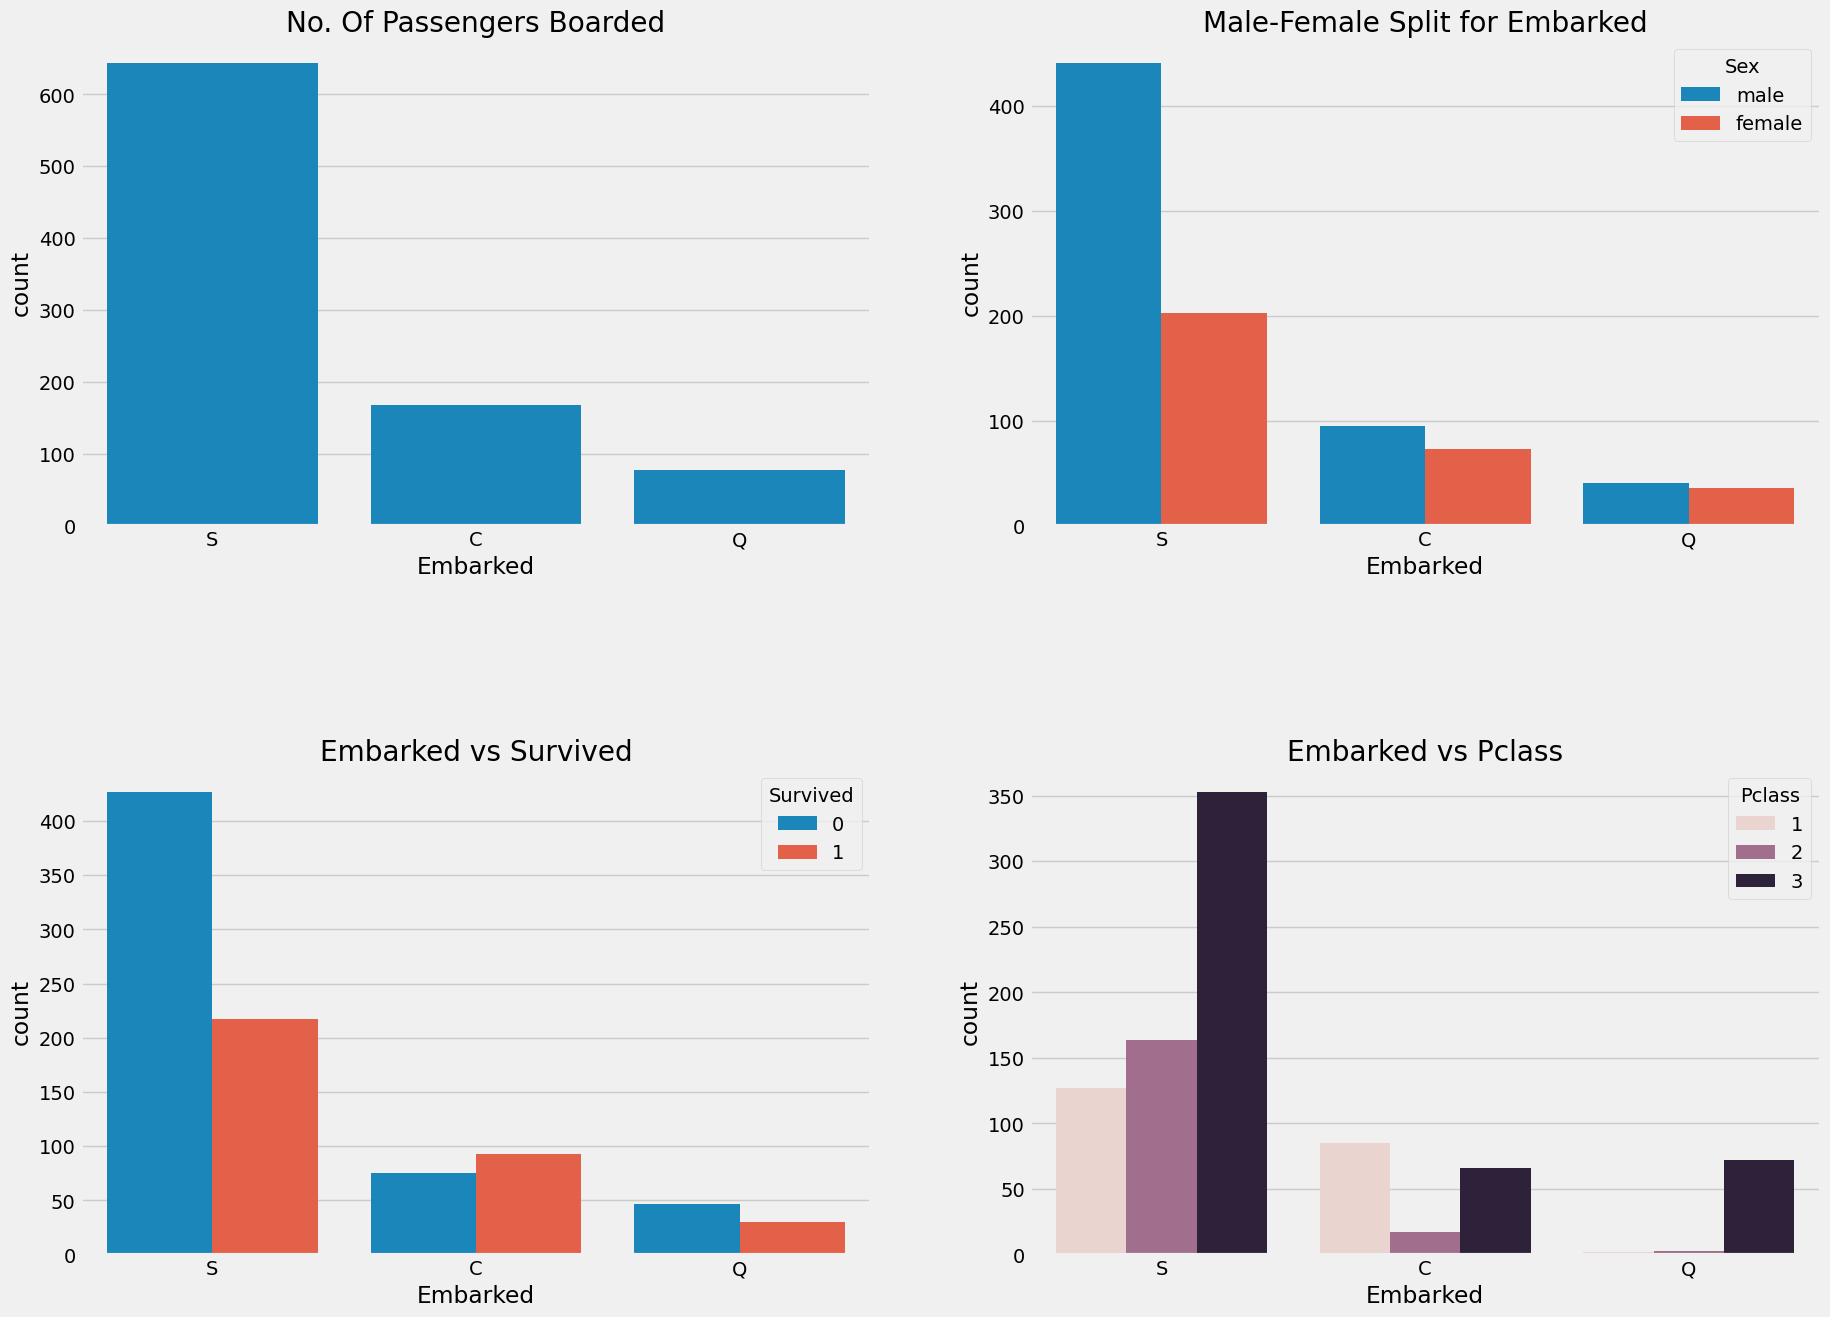

In [ ]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot(x='Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot(x='Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot(x='Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot(x='Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()


# 가장 많이 탑승한 항구: S
# Pclass1의 대부분은 S항구에서 탑승했지만, S항구의 생존율은 높지 않음 (Pclass3의 81% 사망)
# C: 생존자 > 사망자, S&Q: 생존자 < 사망자
# Q: 약 95%의 탑승객이 Pclass3

In [ ]:
pd.crosstab(data.Embarked, data.Pclass)
# 72/(2+3+72) = 0.95

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [ ]:
pd.crosstab([data.Embarked, data.Pclass], data.Survived)
# 286/(286+67) = 0.81

Survived           0   1
Embarked Pclass         
C        1        26  59
         2         8   9
         3        41  25
Q        1         1   1
         2         1   2
         3        45  27
S        1        53  74
         2        88  76
         3       286  67

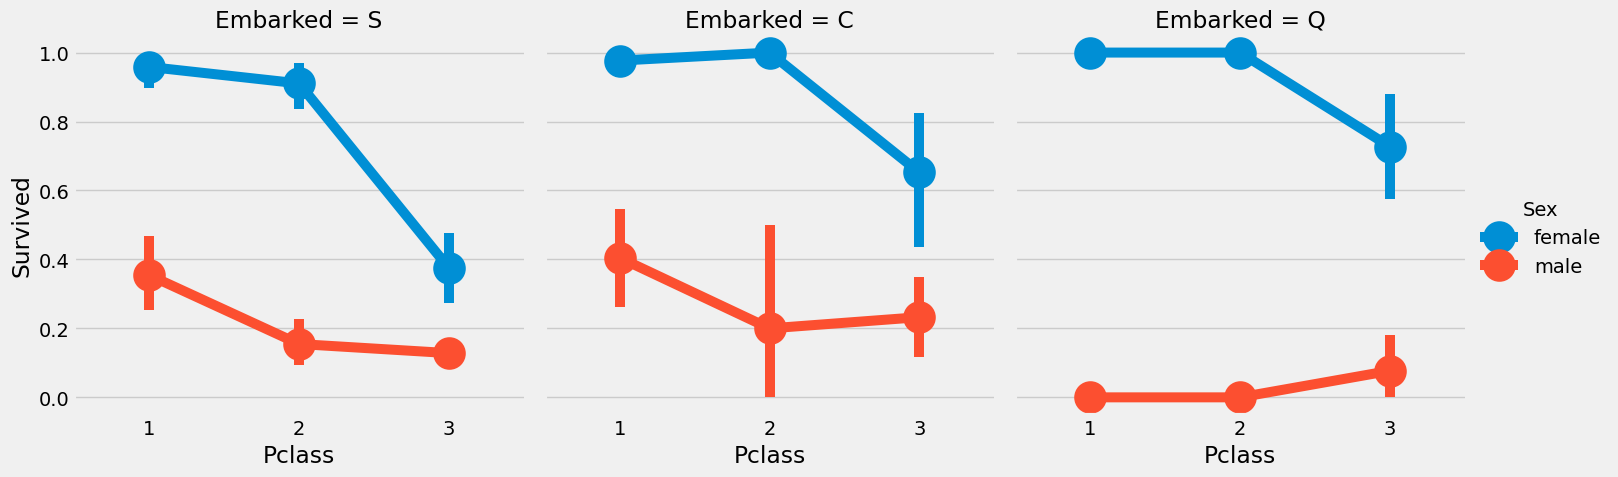

In [ ]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', col='Embarked', data=data, kind='point')
plt.show()

In [ ]:
# Fill Embarked NaN
data['Embarked'].fillna('S', inplace=True)

In [ ]:
data.Embarked.isnull().any()

False



---




In [ ]:
# SibSp: Sibling & Spouse

pd.crosstab(data.SibSp, data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


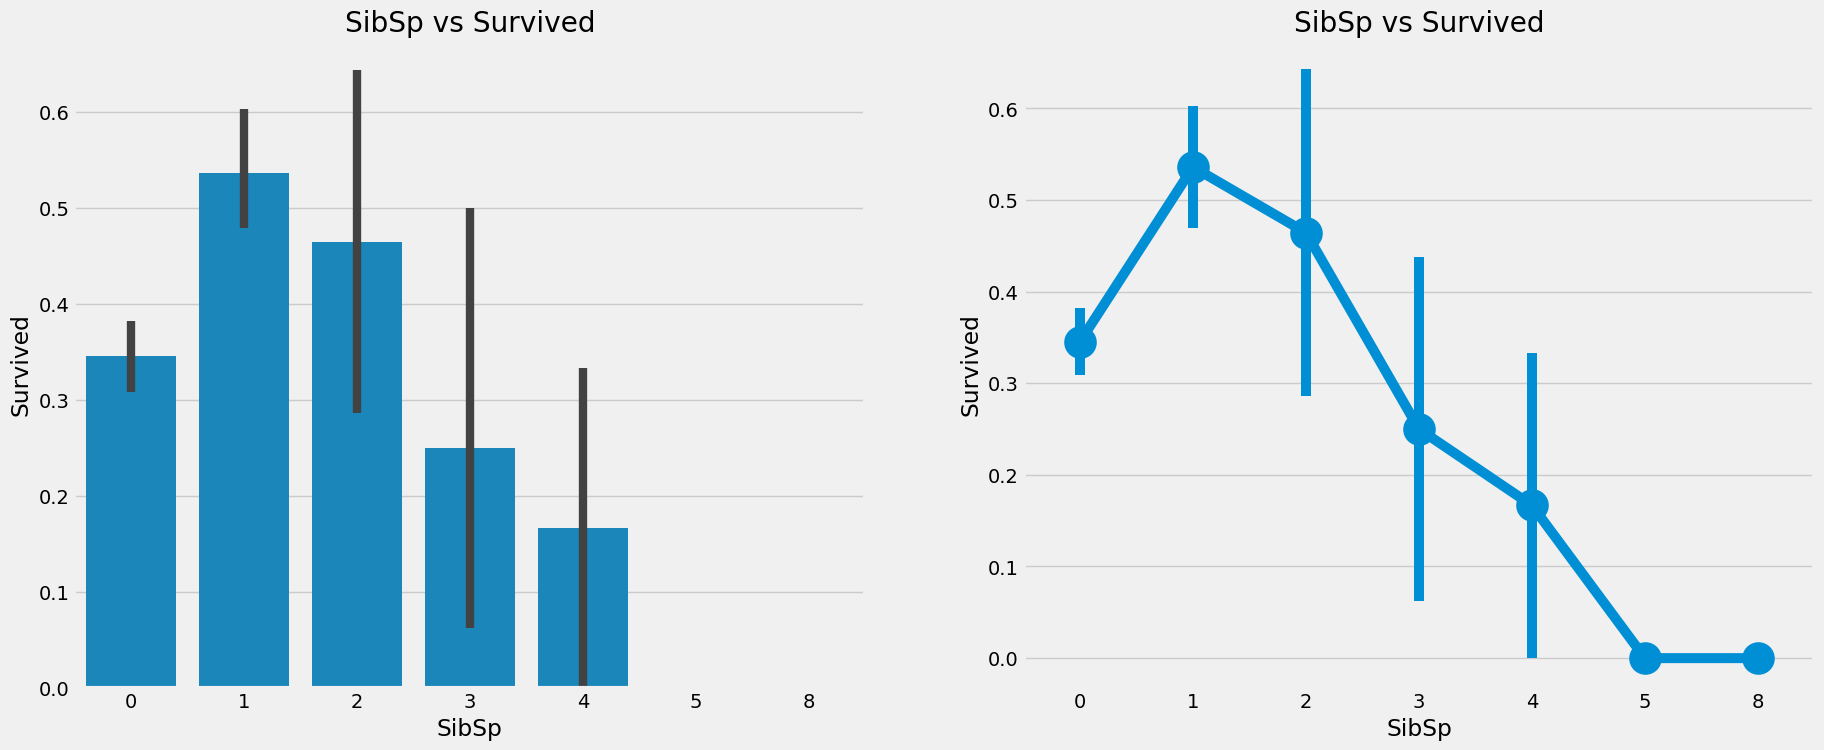

In [ ]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')
sns.pointplot(x = 'SibSp', y= 'Survived', data= data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [ ]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


⛴️ 데이터분석: barplot과 pointplot을 볼 때 SibSp 0인 혼자 탑승한 승객의 생존율은 35%이고, SibSp의 수가 늘어날수록 생존율이 감소하는 것을 알 수 있다. 이는 가족이 있으면 자신보다 가족을 먼저 구하려 했던 것으로 추측할 수 있다. 놀랍게도 5~8명의 가족을 둔 탑승객의 생존율은 0%였다. 그 이유는 **좌석등급(Pclass)**에 있다. crosstab을 보면, SibSp가 4명 이상인 승객은 모두 3등석(Pclass 3) 탑승객이었음을 알 수 있다. 즉 3등석이면서, 데리고 탄 형제자매,배우자 수가 많으면 거의 사망했음을 알 수 있다.



---



In [ ]:
# Parch - parent & child

pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


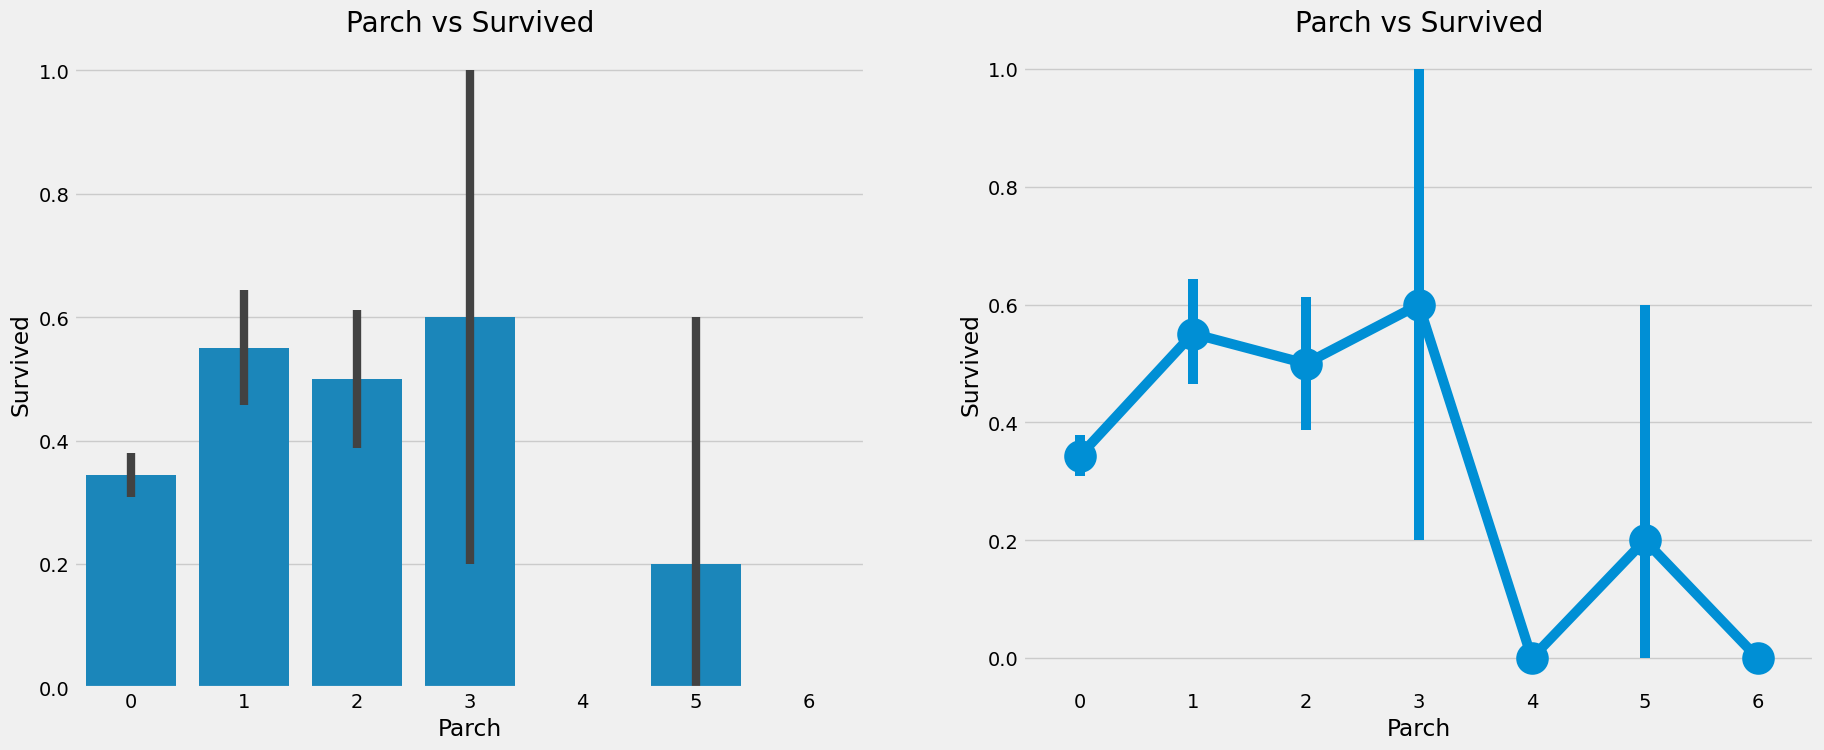

In [ ]:
f, ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot(x='Parch', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')
sns.pointplot(x='Parch', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')
plt.close(2)
plt.show()

⛴️ 데이터분석: 부모와 함께 탑승한 승객의 생존 확률이 더 높으며, 부모 수가 많아질수록 생존 확률은 감소한다. 부모가 1-3명인 경우 생존 확률이 높고, 혼자 탑승한 경우 생존 확률이 낮으며, 부모가 4명 이상인 경우 생존 확률이 더욱 낮아진다.



---



In [ ]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


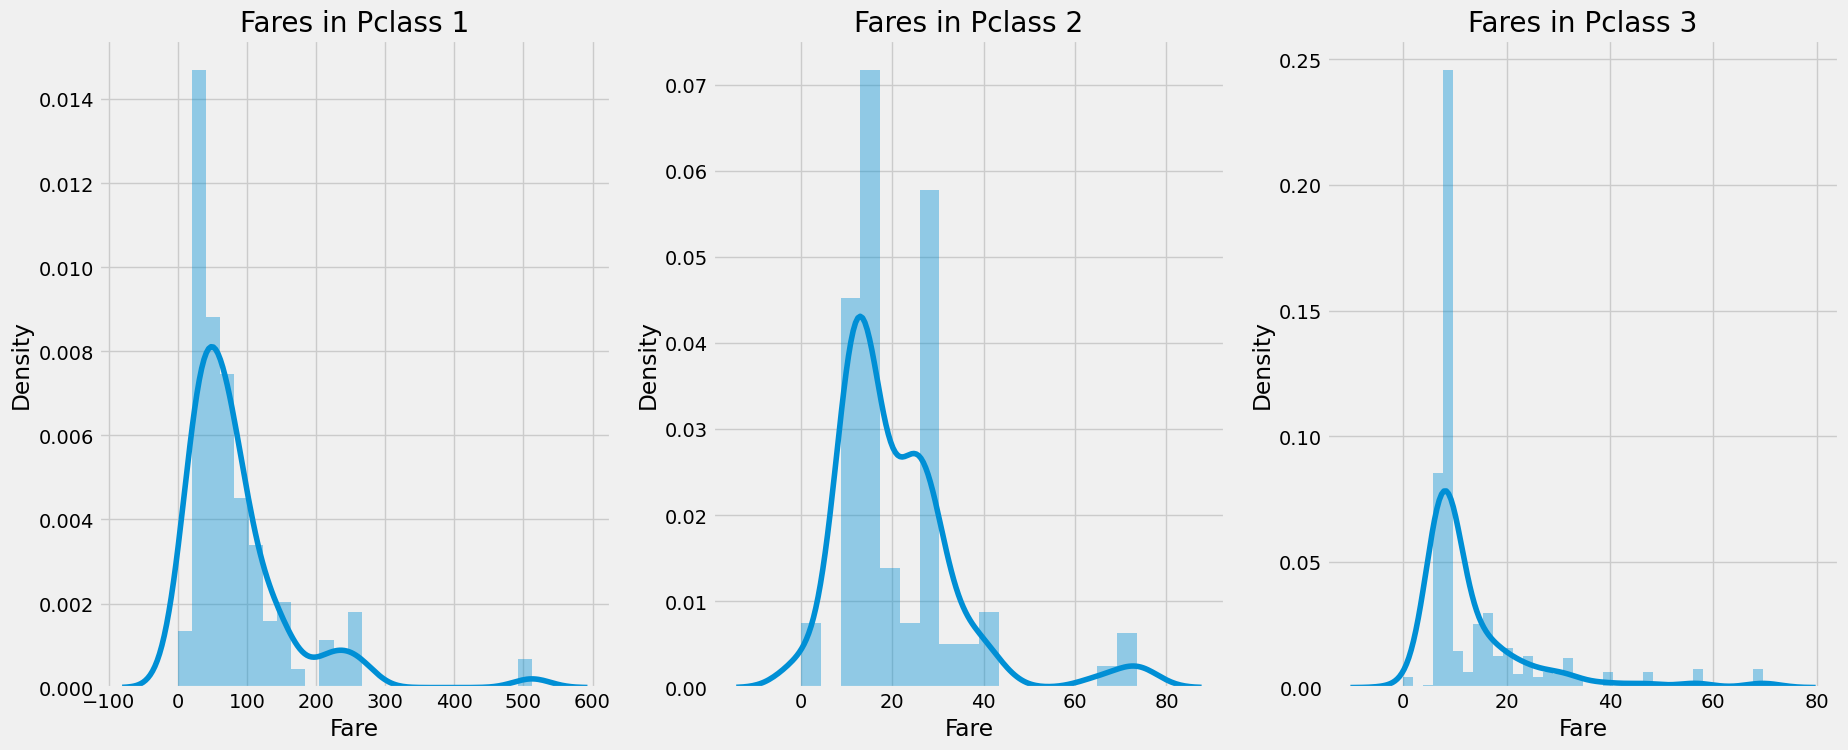

In [ ]:
f, ax = plt.subplots(1,3,figsize=(20,8))
sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

[Nutshell]
- **Sex**: 여성의 생존 확률이 남성보다 높음.
- **Pclass**: 1등석 승객일수록 생존 확률이 높고, 3등석의 생존율은 매우 낮음. 특히 1등석 여성의 생존 확률은 거의 1에 가까움.
- **Age**: 5-10세 이하 어린이는 생존 확률이 높고, 15-35세 승객의 사망률이 높음.
- **Embarked**: C 항구의 생존 확률이 높고, S 항구는 다수의 1등석 승객이 탑승한 반면 Q 항구는 모두 3등석 승객임.
- **Parch+SibSp**: 형제자매/배우자가 1-2명, 부모가 1-3명인 경우 생존 확률이 높으며, 혼자이거나 큰 가족과 함께일 때 생존 확률이 낮음.



---



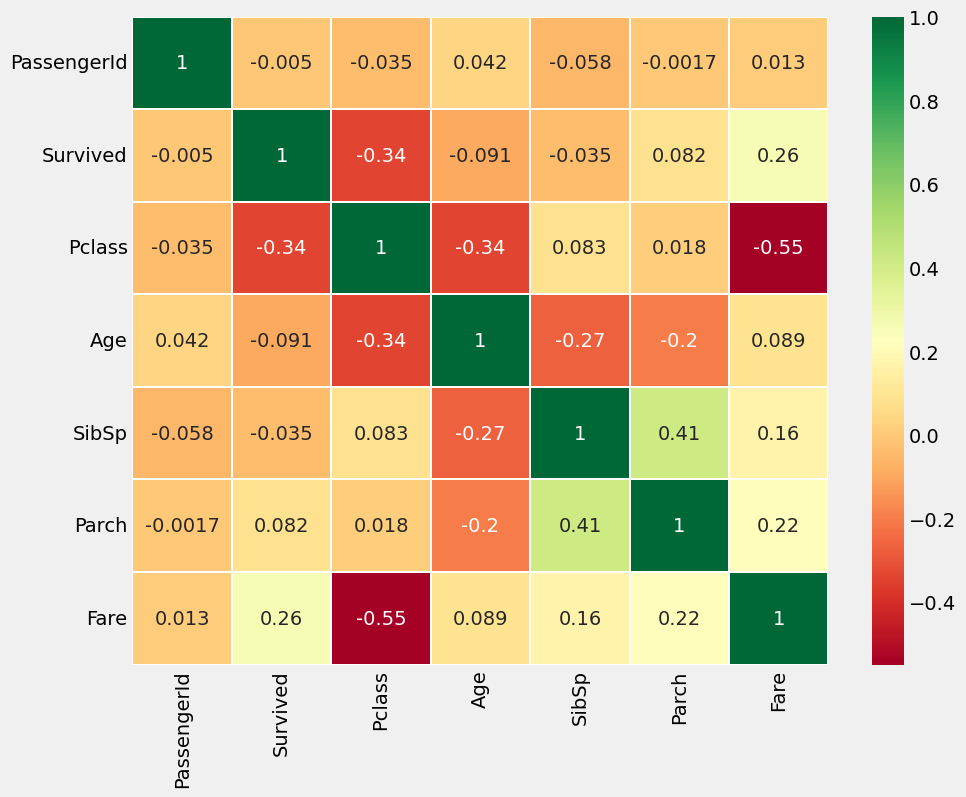

In [ ]:
# Correlation between features
sns.heatmap(data.select_dtypes(include=['number']).corr(), annot=True, cmap='RdYlGn', linewidths=0.2) # data.corr() -> correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

# SibSp and Parch: 가장 높은 상관관계가 나타남



---



---



## part2: Feature Engineering and Data Cleaning

예측 모델에 적합한 상태로 유용한 특징을 변환하는 작업

In [ ]:
# Age_band
# convert continuous into categorial values
# 5 bins (max age:80, bins of size:16)

data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band']=3
data.loc[data['Age']>64, 'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [ ]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')
# checking the number of passenegers in each band

,count
Age_band,
1,382
2,325
0,104
3,69
4,11


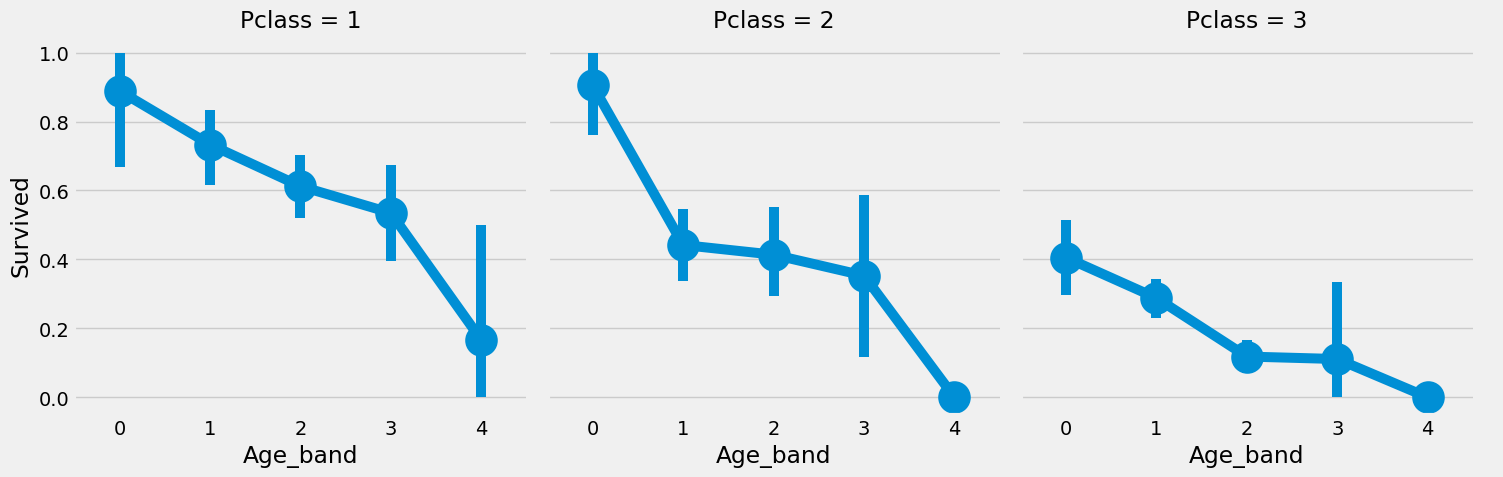

In [ ]:
sns.catplot(x='Age_band', y='Survived', data=data, col='Pclass', kind='point')
plt.show()



---



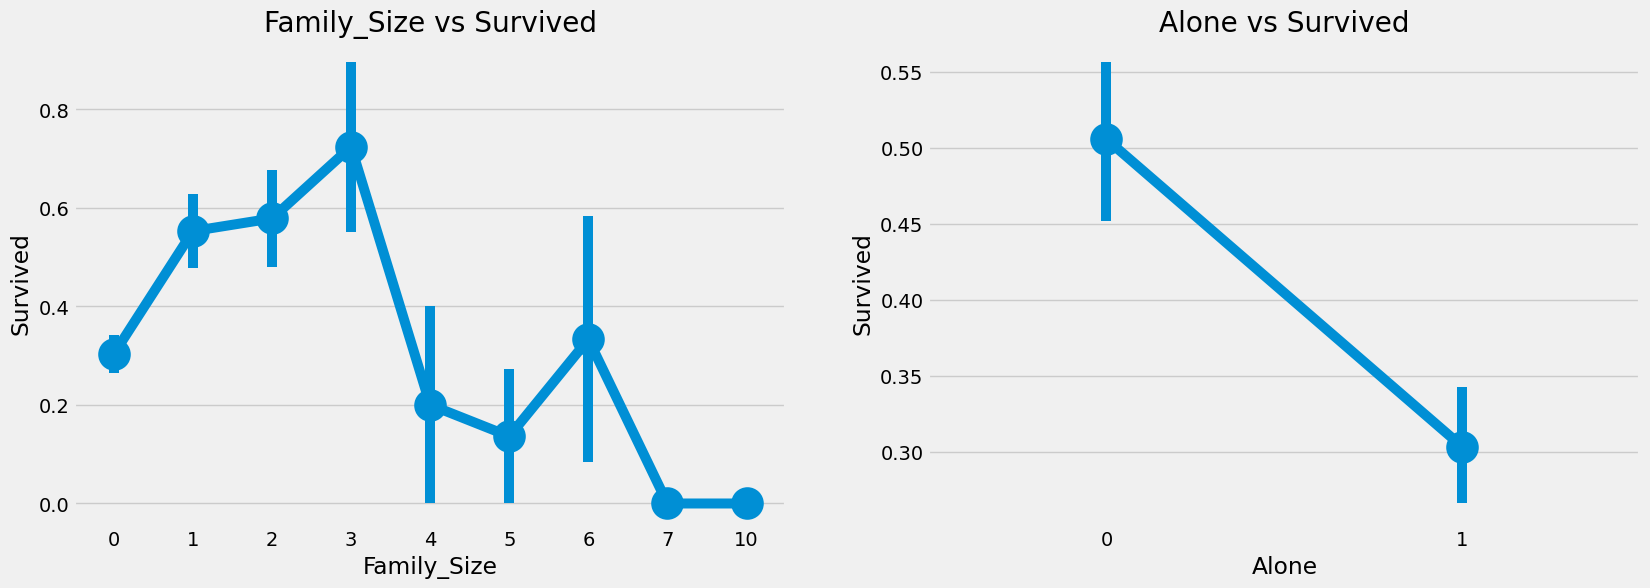

In [ ]:
# Family size ans Alone

data['Family_Size'] = 0
data['Family_Size'] = data['Parch']+data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size==0, 'Alone'] = 1

f, ax  = plt.subplots(1,2,figsize=(18,6))
sns.pointplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.pointplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

# Family_Size=0 : alone을 의미
# Family_Size=0 or 4이상: 생존율 하락

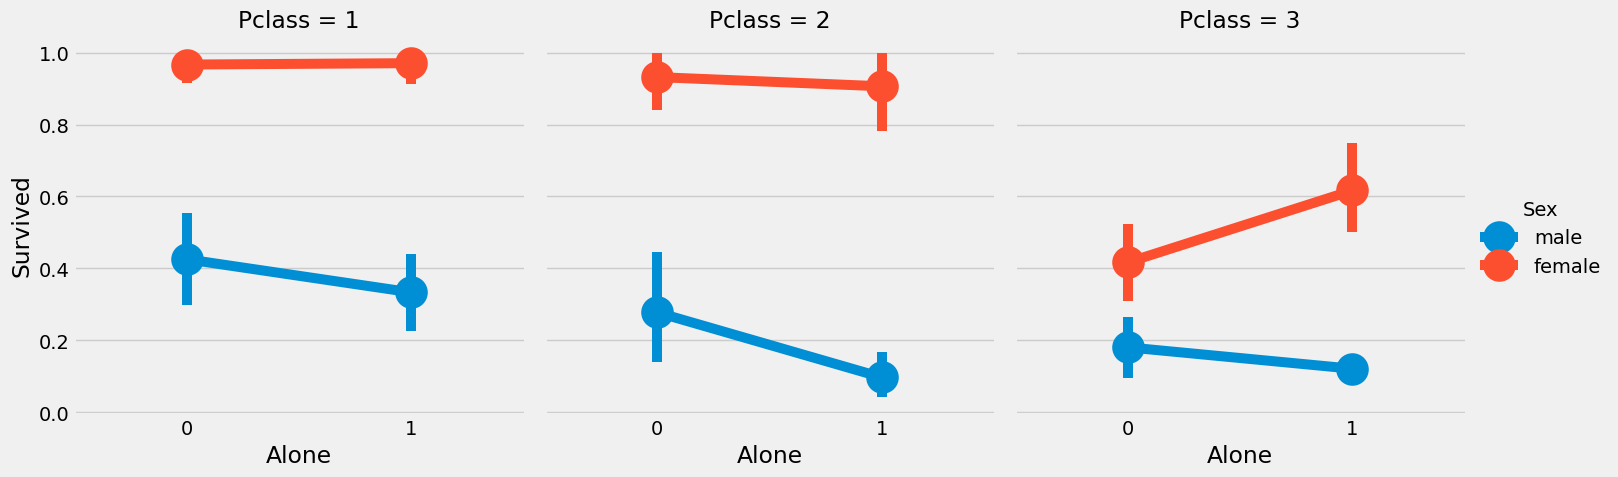

In [ ]:
sns.catplot(x='Alone', y='Survived', data=data, hue='Sex', col='Pclass', kind='point')
plt.show()



---



In [ ]:
# Fare_Range
# pd.qcut: 데이터를 같은 크기의 구간으로 나누는 것

data['Fare_Range'] = pd.qcut(data['Fare'],4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
data['Fare_cat'] = 0
data.loc[data['Fare']<=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31)&(data['Fare']<=513), 'Fare_cat'] = 3

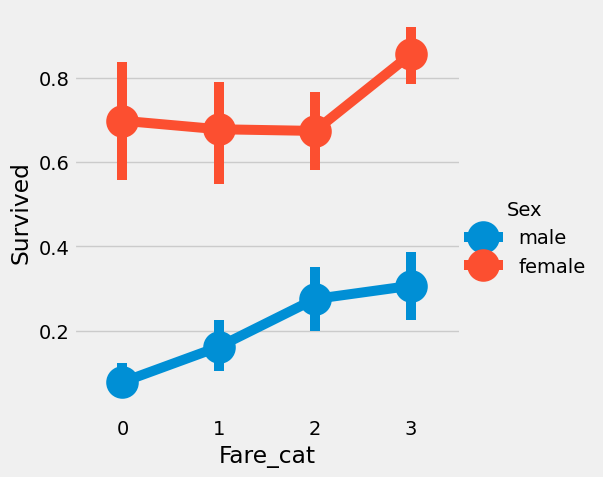

In [ ]:
sns.catplot(x='Fare_cat', y='Survived', data=data, hue='Sex', kind='point')
plt.show()

⛴️ 데이터 분석: Fare_cat이 증가할수록 survival chance는 증가한다. Sex와 함께 중요한 특성이다.



---



In [ ]:
# Converting String Values into Numeric

data['Sex'].replace(['male', 'female'],[0,1],inplace=True)
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

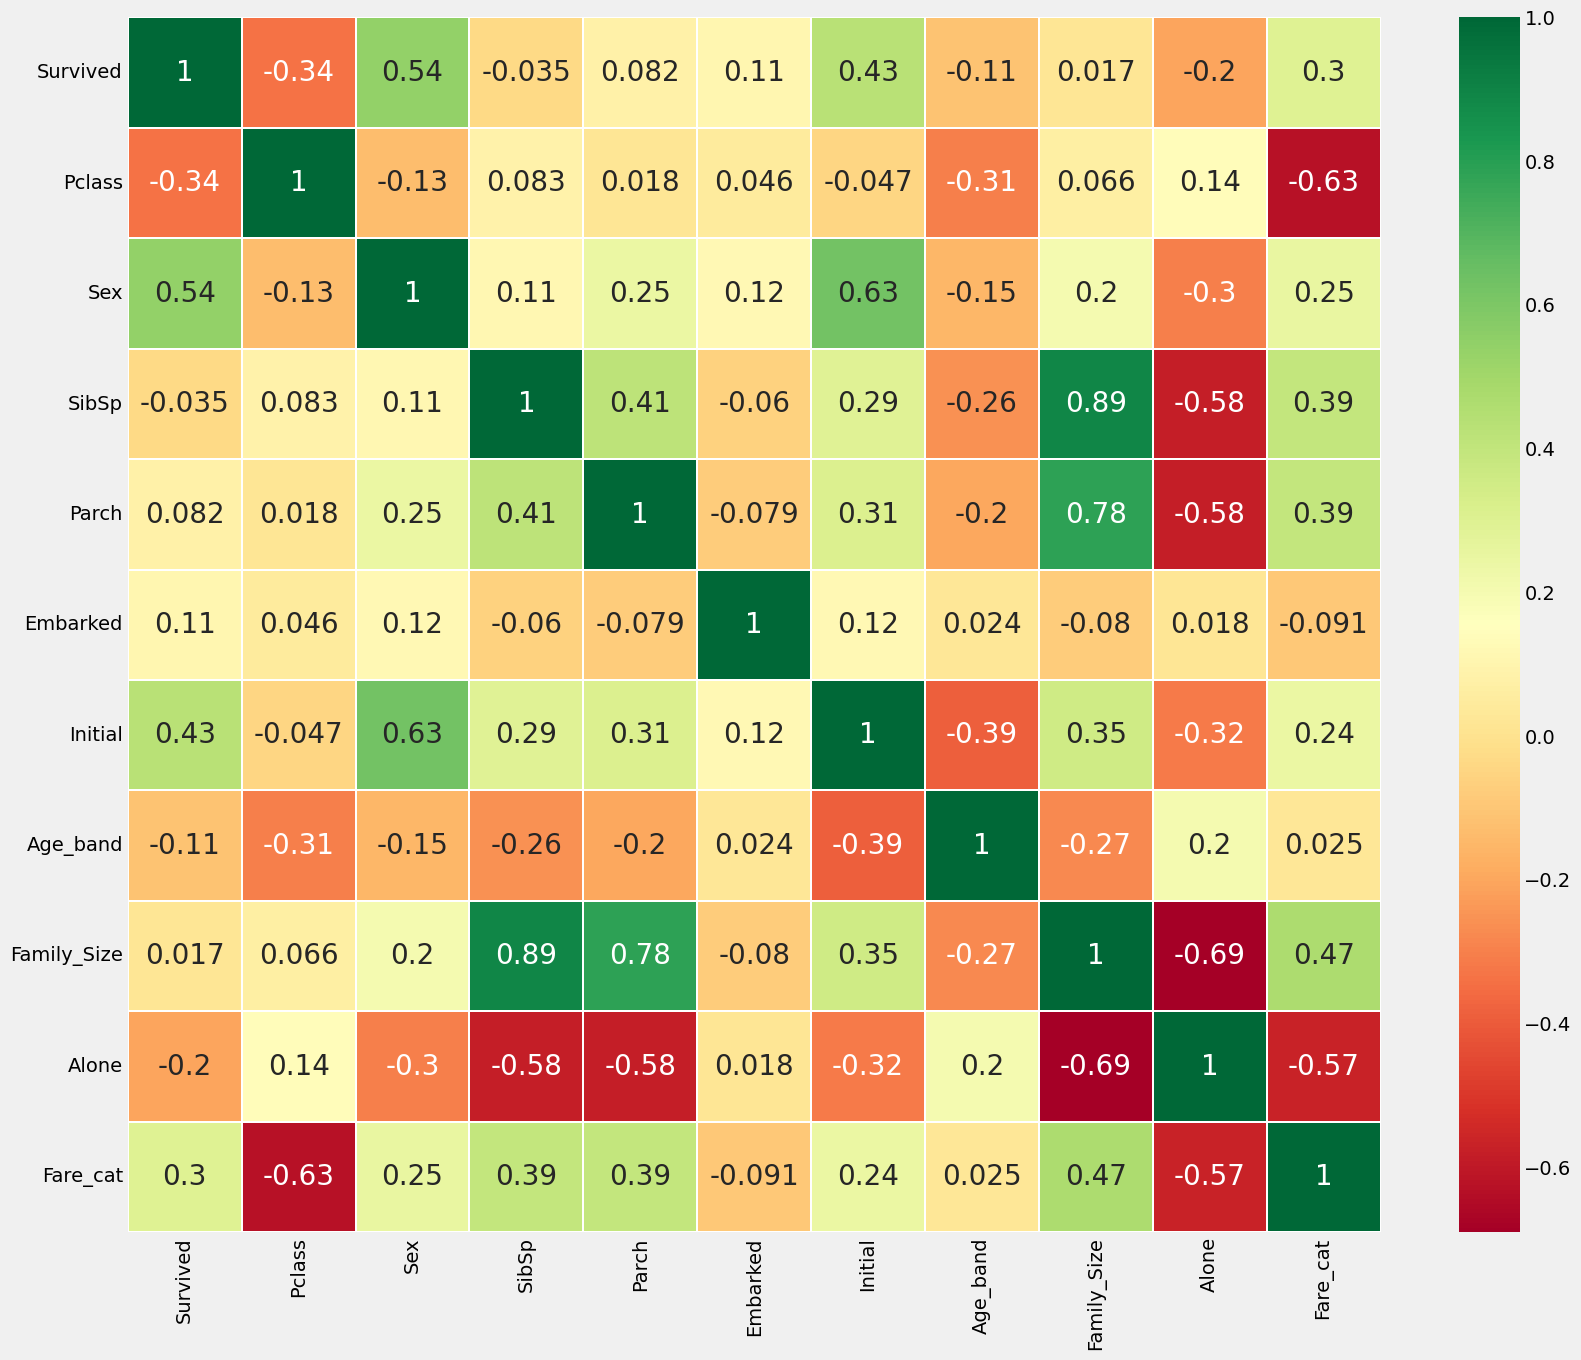

In [ ]:
# Dropping UnNeeded Features

data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()



---



---



## part3: Predictive Modeling

1)Logistic Regression

2)Support Vector Machines(Linear and radial)

3)Random Forest

4)K-Nearest Neighbours

5)Naive Bayes

6)Decision Tree


In [ ]:
# importing all the required ML packages

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
# stratify=data['Survived']:'Survivied'의 비율이 train dataset과 test dataset에서 동일하게 유지

train_X = train[train.columns[1:]] # 첫 번째 열을 제외한 나머지 열을 선택하여 train_X에 저장
train_Y = train[train.columns[:1]] # 첫 번째 열만 선택하여 train_Y에 저장

test_X = test[test.columns[1:]]

test_Y = test[test.columns[:1]]
X= data[data.columns[1:]]
Y= data['Survived']

In [ ]:
# Radial Support Vector Machines (rbf-SVM)

model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is', metrics.accuracy_score(prediction1, test_Y))

Accuracy for rbf SVM is 0.835820895522388


In [ ]:
# Linear Support Vector Machine(linear-SVM)

model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is 0.8171641791044776


In [ ]:
# Logistic Regression

model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


In [ ]:
# Decision Tree

model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


In [ ]:
# K-Nearest Neighbours(KNN)

model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is 0.8134328358208955


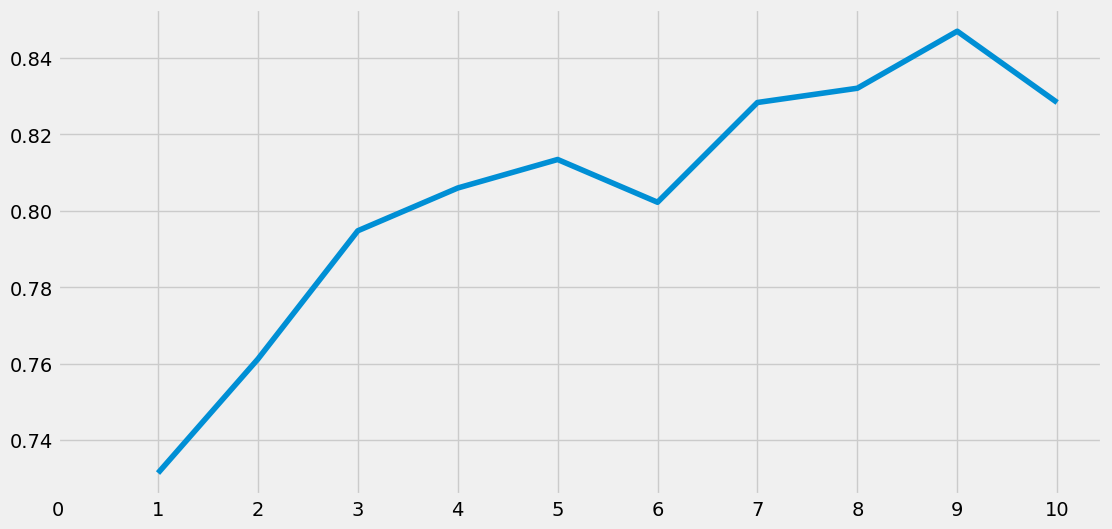

Accuracies for different values of n are: [0.7313432835820896, 0.7611940298507462, 0.7947761194029851, 0.8059701492537313, 0.8134328358208955, 0.8022388059701493, 0.8283582089552238, 0.832089552238806, 0.8470149253731343, 0.8283582089552238] with the max value as 0.8470149253731343


In [ ]:
# n_neighbors 값을 변경하면서 KNN 모델의 정확도 변화를 확인합니다 (기본값은 5).

a_index = list(range(1,11))
a = []
x=[0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(train_X, train_Y)
  prediction = model.predict(test_X)
  a.append(metrics.accuracy_score(test_Y, prediction))

plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:', a, 'with the max value as', max(a))

In [ ]:
# Gaussian Naive Bayes

model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


In [ ]:
# Random Forests

model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8059701492537313




---



사기 거래 탐지에서 정상 거래 데이터에 비해 사기 거래 데이터가 극히 적은 경우의 문제를 '데이터 불균형 문제'라고 한다. 이 데이터로 학습한 모델은 대다수 데이터에 치우친 예측을 하게 된다.
이를 해결하기 위해 **K-Fold Cross Validation**을 수행한다.

1.   데이터셋을 k개의 부분으로 나눈다
2.   예를 들어, k=5로 나누면, 1개의 부분을 테스트용으로 남기고 나머지 4개 부분을 학습에 사용한다.
3.    각 반복마다 테스트 부분을 바꿔가며 학습과 테스트를 반복하고, 최종적으로 모든 정확도와 오류를 평균 내어 알고리즘의 평균 정확도를 구한다.
4.    일반화된 모델: 교차 검증을 통해 특정 데이터에 **과소적합(underfit)**하거나 **과적합(overfit)**하지 않는 일반화된 모델을 얻을 수 있다.



In [ ]:
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # prediction


kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
xyz = [] # 각 모델의 평균 교차 검증 정확도를 저장하는 리스트
accuracy = [] # 각 모델의 교차 검증 정확도를 저장하는 리스트
std = [] # 각 모델의 교차 검증 정확도의 표준편차를 저장하는 리스트

classifiers = ['Logistic Svm', 'Radial Svm', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']
models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(),KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
  model = i
  cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
  cv_result = cv_result
  xyz.append(cv_result.mean())
  std.append(cv_result.std())
  accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean': xyz, 'Std': std}, index=classifiers)
new_models_dataframe2


,CV Mean,Std
Logistic Svm,0.784607,0.057841
Radial Svm,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.808140,0.035630
Decision Tree,0.805868,0.046456
Naive Bayes,0.795843,0.054861
Random Forest,0.806991,0.039947


<Axes: >

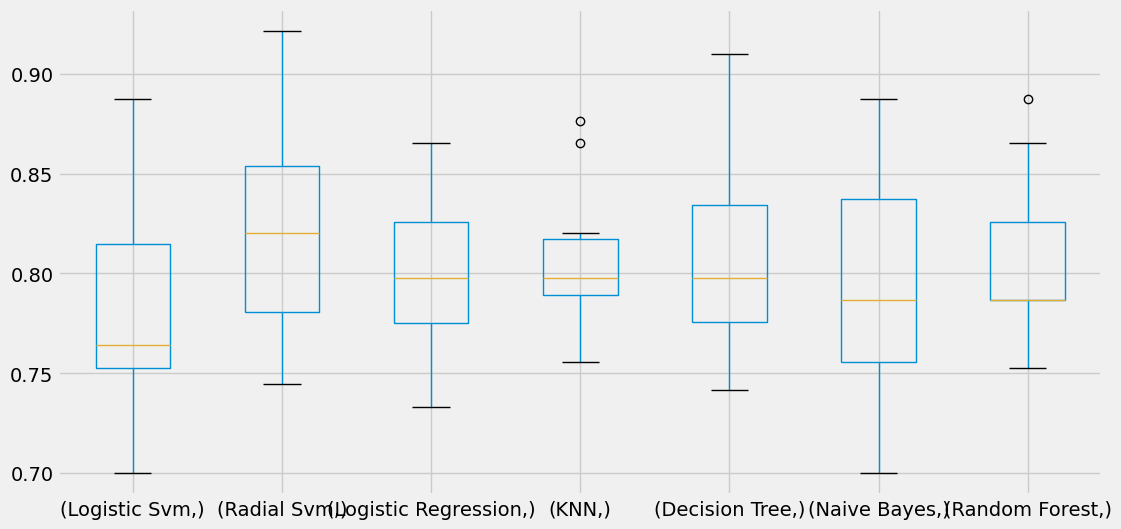

In [ ]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

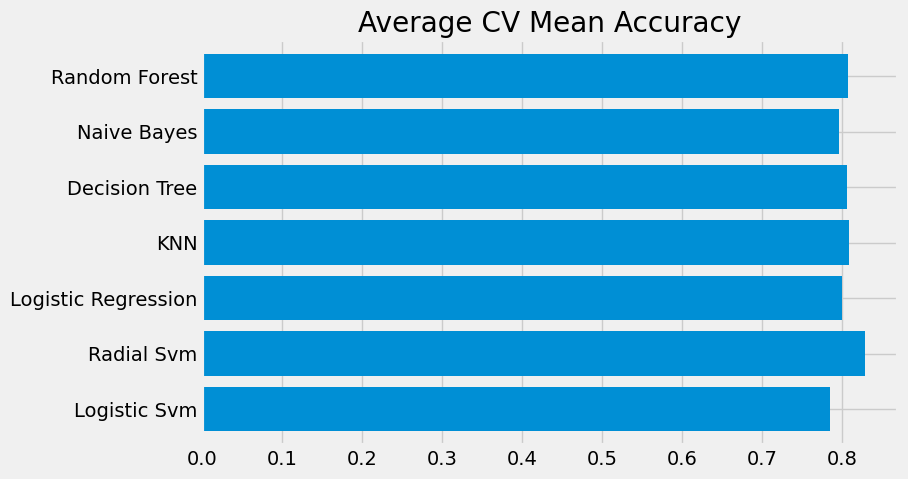

In [ ]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()



---



Confusion Matrix는 분류기가 수행한 올바른 예측과 잘못된 예측의 수를 보여준다

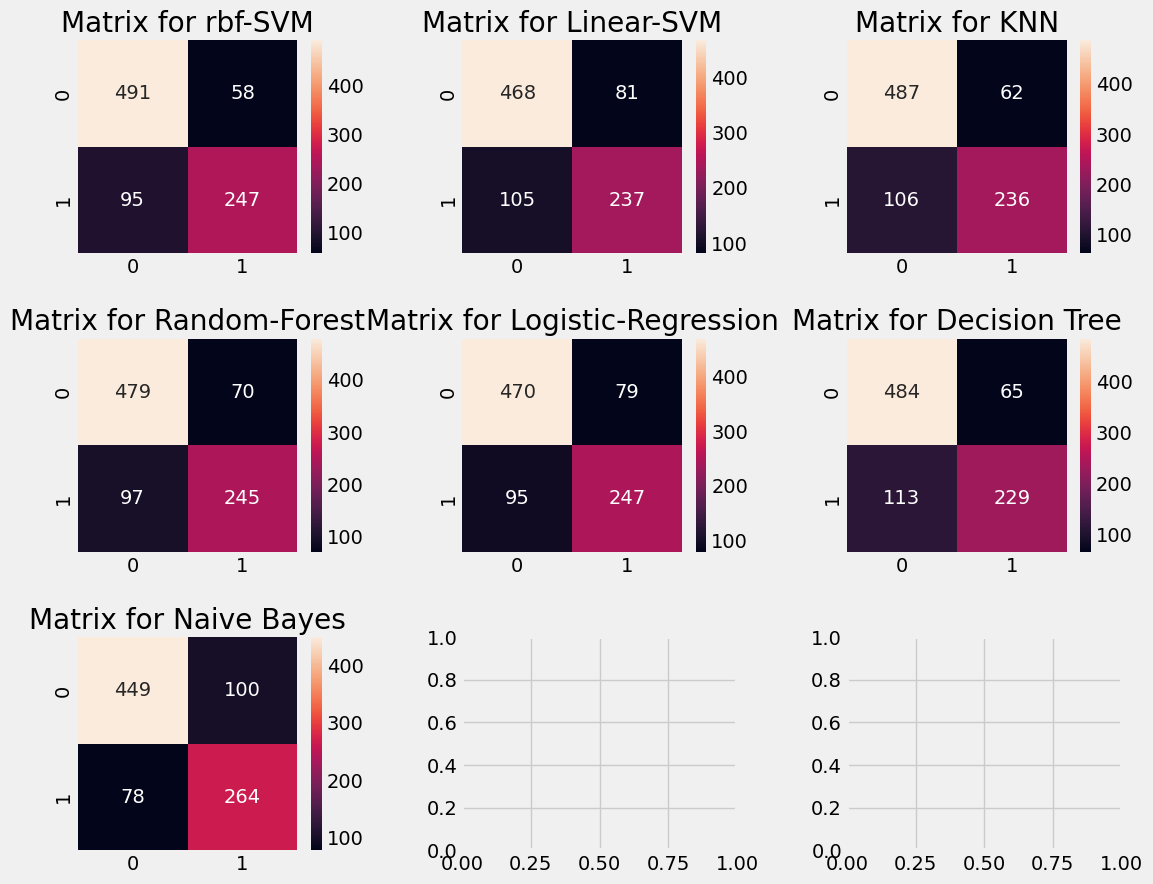

In [ ]:
f, ax = plt.subplots(3,3,figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forest')

y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic-Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred), ax=ax[2,0], annot=True, fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

⛴️ 혼동행렬 해석: 왼쪽 대각선은 각 클래스에 대한 올바른 예측 수를, 오른쪽 대각선은 잘못된 예측 수를 나타낸다. 예를 들어, rbf-SVM 모델의 첫 번째 혼동 행렬을 보면
- 정확한 예측: 사망자 491명, 생존자 247명으로, 평균 교차 검증 정확도는 (491+247)/891 = 82.8%
- 오류: 58명의 사망자를 생존자로, 95명의 생존자를 사망자로 잘못 예측했으며, 사망자를 생존자로 잘못 예측하는 경우가 더 많음



---




분류기마다 매개변수(하이퍼 파라미터)를 조정하여 알고리즘의 학습 속도를 변경하고 더 나은 모델을 얻을 수 있다. 이를 **하이퍼 파라미터 튜닝**이라고 한다.

In [ ]:
# SVM (하이퍼파라미터: C, gamma)

from sklearn.model_selection import GridSearchCV

C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel, 'C':C, 'gamma':gamma}

gd=GridSearchCV(estimator=svm.SVC(), param_grid=hyper, verbose=True) # param_grid: 튜닝하고자 하는 하이퍼파라미터와 그 가능값
gd.fit(X,Y)

print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


In [ ]:
# Random Forest (하이퍼파라미터: n_estimators)

n_estimators = range(100,1000,100)
hyper = {'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.819327098110602
RandomForestClassifier(n_estimators=300, random_state=0)


결과
- best score for rbf-SVM : 82.82% with C=0.4, gamma=0.3
- best score for RandomForest : 81.9% with n_estimators=900



---



**앙상블(Ensembling)**은 여러 개의 간단한 모델을 결합하여 하나의 강력한 모델을 만드는 것으로, 모델의 정확도나 성능을 높일 수 있다.



1.   Voting Classifier
2.   Bagging
3.   Boosting



In [ ]:
# Voting Classifier
# 모든 서브 모델의 예측을 기반으로 예측 결과를 제공

from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf = VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                                ('RBF', svm.SVC(probability=True, kernel='rbf', C=0.5, gamma=0.1)),
                                                ('RFor', RandomForestClassifier(n_estimators=500, random_state=0)),
                                                ('LR', LogisticRegression(C=0.05)),
                                                ('DT', DecisionTreeClassifier(random_state=0)),
                                                ('NB', GaussianNB()),
                                                ('svm', svm.SVC(kernel='linear', probability=True))],
                                    voting='soft').fit(train_X, train_Y)
print('The accuracy for ensembled model is:', ensemble_lin_rbf.score(test_X, test_Y))
cross = cross_val_score(ensemble_lin_rbf, X, Y, cv=10, scoring='accuracy')
print('The cross validated score is', cross.mean())


The accuracy for ensembled model is: 0.8208955223880597
The cross validated score is 0.8249188514357053


In [ ]:
# Bagging
# 데이터셋을 여러 개로 나누어 각 샘플에 동일한 분류기를 이용하여 훈련한다

# Voting과의 차이점: 다른 분류기 사용 vs 같은 분류기 사용

from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3), random_state=0, n_estimators=700)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print('The accuracy for bagged KNN is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged KNN is:', result.mean())

The accuracy for bagged KNN is: 0.832089552238806
The cross validated score for bagged KNN is: 0.8104244694132333


In [ ]:
# Bagged DecisionTree

model = BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=0, n_estimators=100)
model.fit(train_X, train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:', metrics.accuracy_score(prediction, test_Y))
result=cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.8208955223880597
The cross validated score for bagged Decision Tree is: 0.8171410736579275


In [ ]:
# Boosting
# 약한 모델을 단계적으로 강화하는 과정
# 잘못 예측한 인스턴스에 집중하여 반복적으로 모델을 개선함으로써 정확도를 높인다

# Adaptive Boosting (weak estimator: Decsion Tree)

from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=200, random_state=0, learning_rate=0.01)
result = cross_val_score(model, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for AdaBoost is:', result.mean())

The cross validated score for AdaBoost is: 0.791210986267166


In [ ]:
# Stochastic Gradient Boosting (weak estimator: Decsion Tree)

from sklearn.ensemble import GradientBoostingClassifier
grad = GradientBoostingClassifier(n_estimators=500, random_state=0, learning_rate =0.1)
result=cross_val_score(grad, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for Gradient Boosting is:', result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


In [ ]:
# XGBoost

import xgboost as xg
xgboost = xg.XGBClassifier(n_estimators=200, learning_rate=0.1)
result=cross_val_score(xgboost, X, Y, cv=10, scoring='accuracy')
print('The cross validated score for XGBoost is:', result.mean())

The cross validated score for XGBoost is: 0.8115480649188515


➡️ AdaBoost가 가장 높은 평균 정확도를 보임

In [ ]:
# Hyper-Parameter Tuning for AdaBoost

n_estimators=list(range(100,1100,100))
learning_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators, 'learning_rate':learning_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(), param_grid=hyper, verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


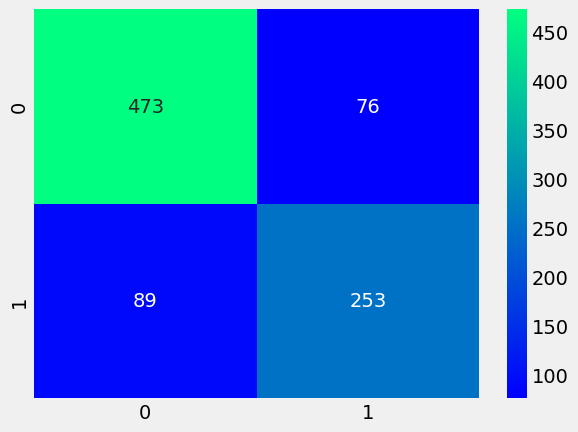

In [ ]:
# Confusion Matrix for the Best Model

ada = AdaBoostClassifier(n_estimators=1000, random_state=0, learning_rate=0.05)
result = cross_val_predict(ada, X, Y, cv=10)
sns.heatmap(confusion_matrix(Y,result), cmap='winter', annot=True, fmt='2.0f')
plt.show()



---



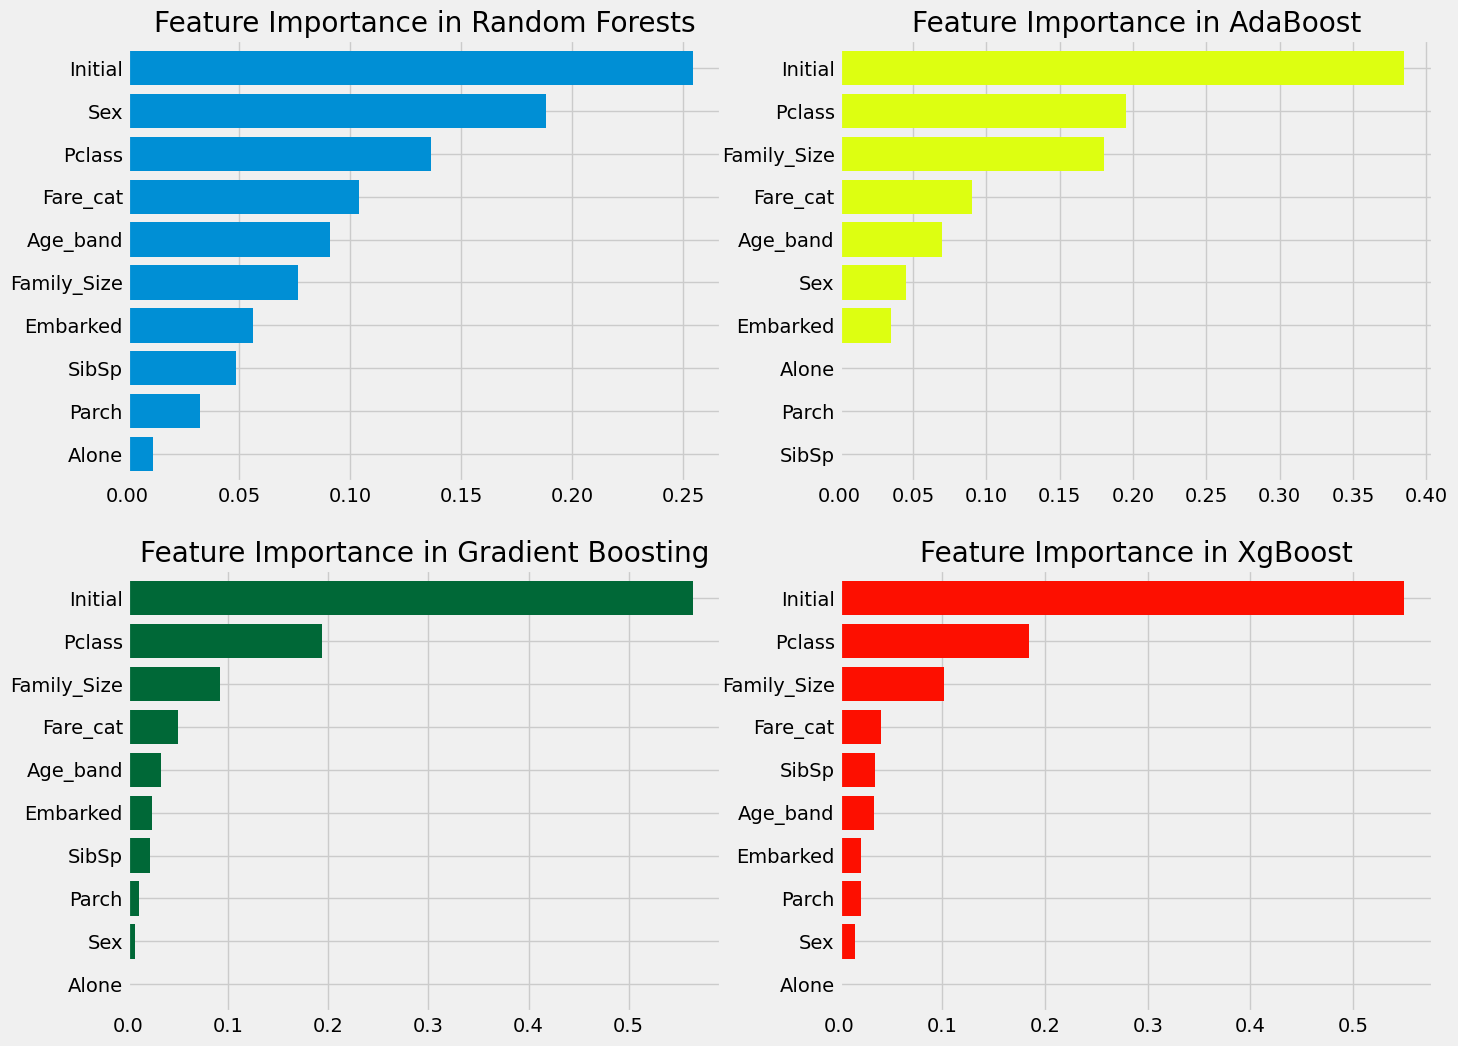

In [ ]:
# Feature importance

f, ax = plt.subplots(2,2, figsize=(15,12))

model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model = AdaBoostClassifier(n_estimators=200, learning_rate=0.05, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[0,1], color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model= GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, random_state=0)
model.fit(X, Y)
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,0], cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model = xg.XGBClassifier(n_estimators=200, learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=True).plot.barh(width=0.8, ax=ax[1,1], color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.show()

중요한 특징: Random Forests, AdaBoost 등 여러 분류기에서 공통적으로 중요한 특징으로는 Initial, Fare_cat, Pclass, Family_Size가 있다

성별: 많은 분류기에서 중요도가 낮게 평가되며, 이는 의외다.